In [1]:
pip install tensorflow==2.2.0


     |████████████████████████████████| 516.2 MB 1.2 kB/s              ████▌       | 395.7 MB 43.2 MB/s eta 0:00:03
     |████████████████████████████████| 2.9 MB 86.1 MB/s            
     |████████████████████████████████| 65 kB 6.8 MB/s             
     |████████████████████████████████| 26.1 MB 91.8 MB/s            
     |████████████████████████████████| 3.0 MB 92.2 MB/s            
     |████████████████████████████████| 454 kB 93.5 MB/s            
     |████████████████████████████████| 781 kB 91.1 MB/s            
     |████████████████████████████████| 152 kB 105.7 MB/s            
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
     |████████████████████████████████| 151 kB 107.0 MB/s            
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Attempting u

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
if not tf.__version__=='2.2.0':
    print(tf.__version__)
    raise ValueError('upgrade to 2.2.0 or restart your kernel')

In [4]:
x = np.arange(0.0,5.0,0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

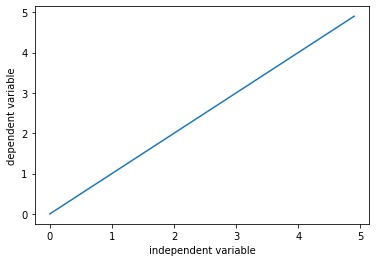

In [5]:
a=1
b=0

y=a*x + b

plt.plot(x,y)
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.show()

In [7]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2022-03-01 16:51:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.001s  

2022-03-01 16:51:59 (99.1 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [8]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
train_x = np.asanyarray(df['ENGINESIZE'])
train_y = np.asanyarray(df['CO2EMISSIONS'])

In [21]:
w = tf.Variable(20.0)
b = tf.Variable(10.0)

def h(x):
    y = w*x+b
    return y

In [22]:
def loss_fun(y, train_y):
    return tf.reduce_mean(tf.square(y-train_y))

In [26]:
learning_rate = 0.01
train_data = []
loss_values =[]
w_values = []
b_values = []
# steps of looping through all your data to update the parameters
training_epochs = 200

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_fun(train_y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,w])
        
        # compute and adjust weights
        w_values.append(w.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        w.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([w.numpy(), b.numpy()])

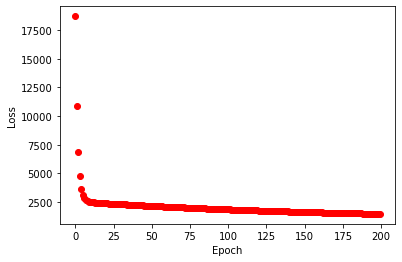

In [27]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

In [29]:
import matplotlib.patches as mpatches

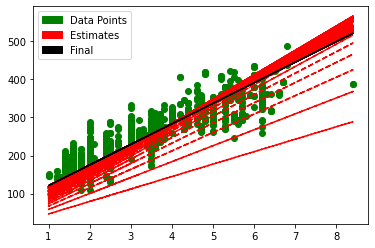

In [30]:
plt.scatter(train_x, train_y, color='green')
for w,b in zip(w_values[0:len(w_values)], b_values[0:len(b_values)]):
    plt.plot(train_x,w*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,w_values[-1]*train_x+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()